In [ ]:
import h5py
import numpy as np

def cargar_senal(nombre_archivo):
    with h5py.File(nombre_archivo, 'r') as archivo:
        ruta = None
        for key in archivo.keys():
            posible = f"{key}/raw/channel_1"
            if posible in archivo:
                ruta = posible
                break
        if ruta is None:
            raise ValueError("No se encontró 'raw/channel_1' en el archivo.")
        senal = archivo[ruta][:]
    return senal

# Carga de señales reales
reposo = cargar_senal("reposo1d.h5")
simple = cargar_senal("simple1d.h5")
contra = cargar_senal("contra1d.h5")

In [ ]:
from scipy.signal import butter, firwin, lfilter

# Filtro IIR Butterworth paso bajo
def filtro_iir_butter(signal, fs=1000, fc=60, orden=4):
    b, a = butter(orden, fc / (0.5 * fs), btype='low', analog=False)
    return lfilter(b, a, signal)

# Filtro FIR Hamming paso bajo
def filtro_fir_hamming(signal, fs=1000, fc=40, taps=51):
    coef = firwin(taps, fc / (0.5 * fs), window='hamming')
    return lfilter(coef, 1.0, signal)

# Aplicar los filtros a las 3 señales
reposo_iir = filtro_iir_butter(reposo)
simple_iir = filtro_iir_butter(simple)
contra_iir = filtro_iir_butter(contra)

reposo_fir = filtro_fir_hamming(reposo)
simple_fir = filtro_fir_hamming(simple)
contra_fir = filtro_fir_hamming(contra)

In [ ]:
def graficar_emg_completo(signal_cruda, signal_iir, signal_fir, titulo_base):
    tiempo = np.arange(len(signal_cruda[:1000]))
    cruda = np.ravel(signal_cruda[:1000])
    iir = np.ravel(signal_iir[:1000])
    fir = np.ravel(signal_fir[:1000])

    # Gráfico 1: Las 3 señales superpuestas
    plt.figure(figsize=(12, 5))
    plt.plot(tiempo, cruda, color='blue', label='Señal Cruda')
    plt.plot(tiempo, iir, color='orange', linestyle='--', label='Filtrada IIR (Butterworth)')
    plt.plot(tiempo, fir, color='green', linestyle=':', label='Filtrada FIR (Hamming)')
    plt.title(f"{titulo_base} - Señales Superpuestas (Amplitud Real)")
    plt.xlabel("Tiempo (muestras)")
    plt.ylabel("Amplitud (mV)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Solo Cruda
    plt.figure(figsize=(12, 3))
    plt.plot(tiempo, cruda, color='blue')
    plt.title(f"{titulo_base} - Señal Cruda")
    plt.xlabel("Tiempo (muestras)")
    plt.ylabel("Amplitud (mV)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Gráfico 3: Solo IIR
    plt.figure(figsize=(12, 3))
    plt.plot(tiempo, iir, color='orange')
    plt.title(f"{titulo_base} - Señal Filtrada IIR (Butterworth)")
    plt.xlabel("Tiempo (muestras)")
    plt.ylabel("Amplitud (mV)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Gráfico 4: Solo FIR
    plt.figure(figsize=(12, 3))
    plt.plot(tiempo, fir, color='green')
    plt.title(f"{titulo_base} - Señal Filtrada FIR (Hamming)")
    plt.xlabel("Tiempo (muestras)")
    plt.ylabel("Amplitud (mV)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



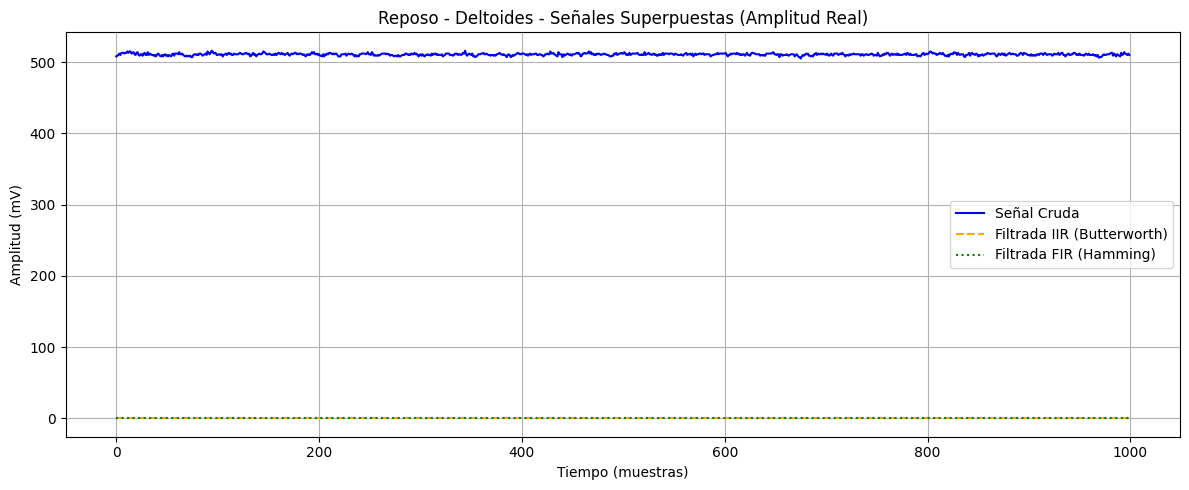

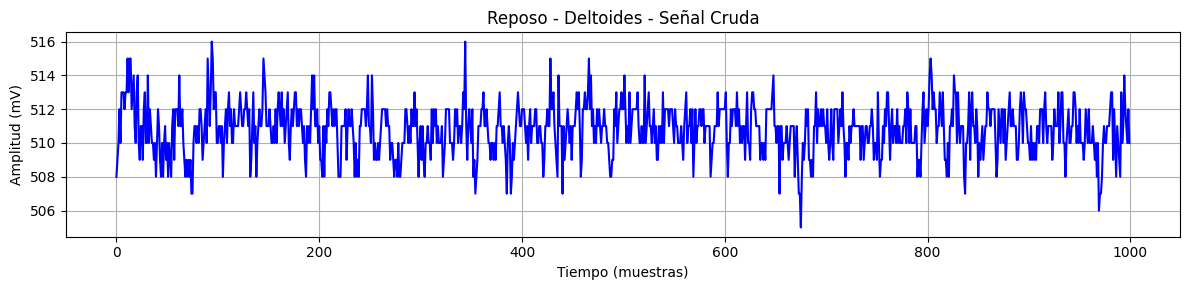

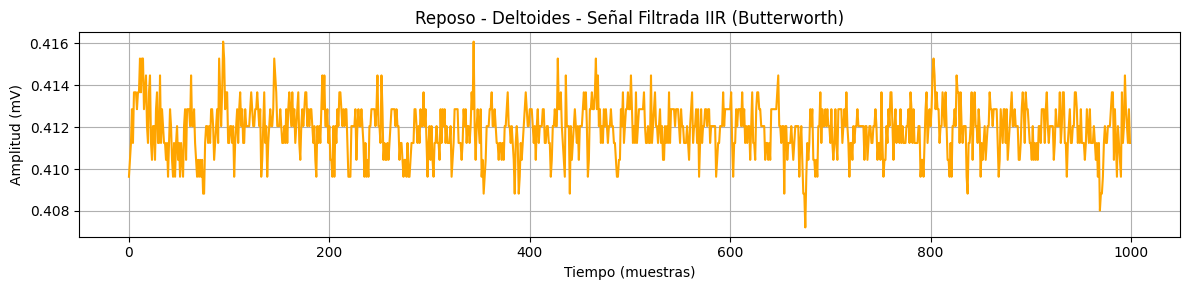

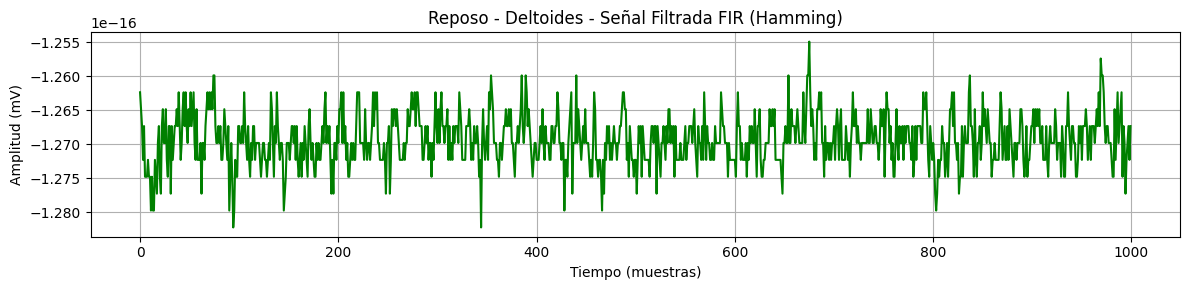

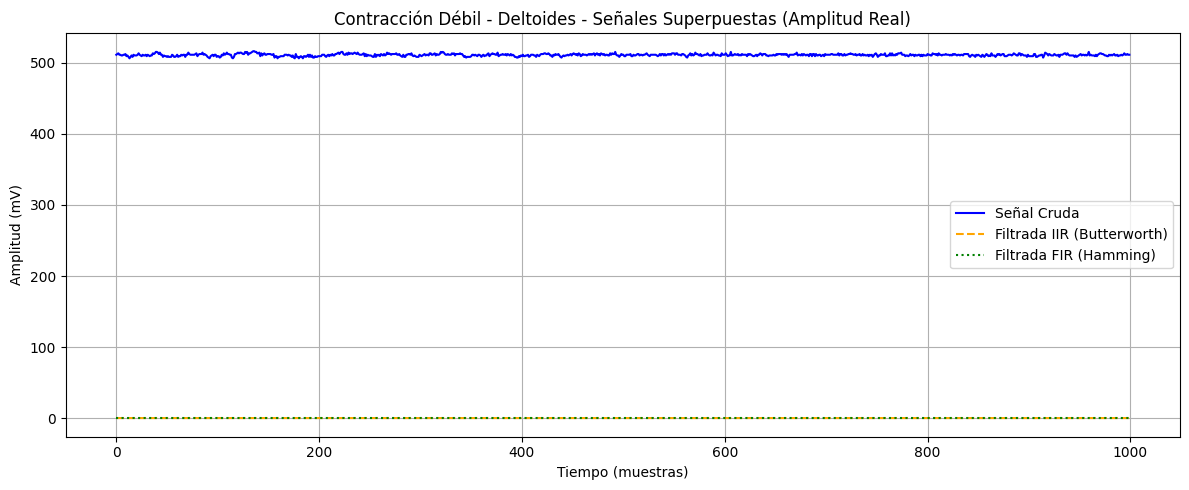

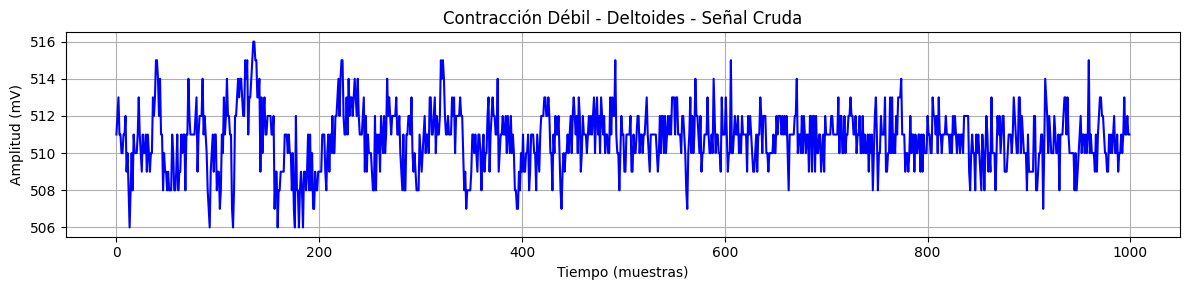

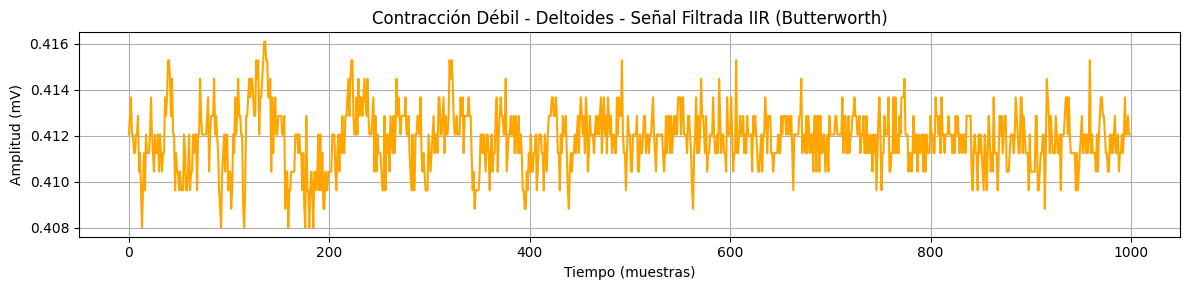

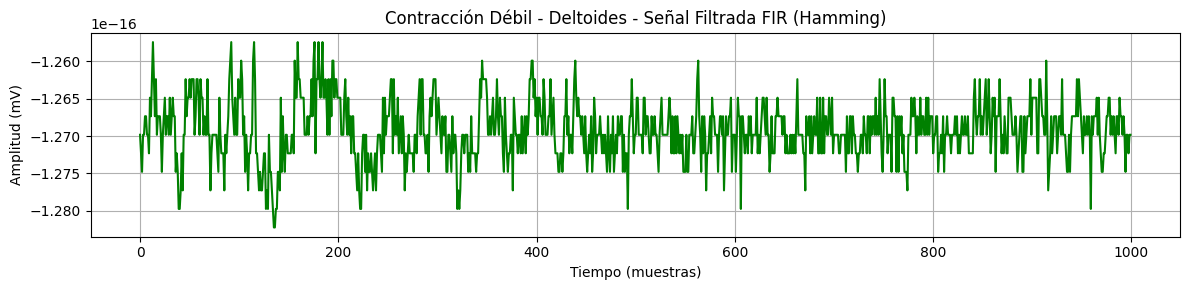

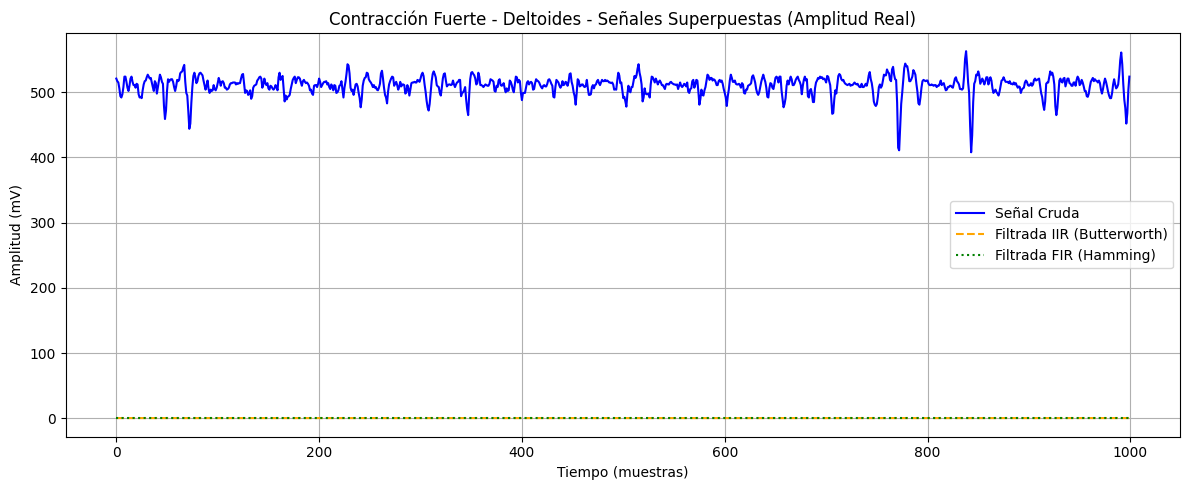

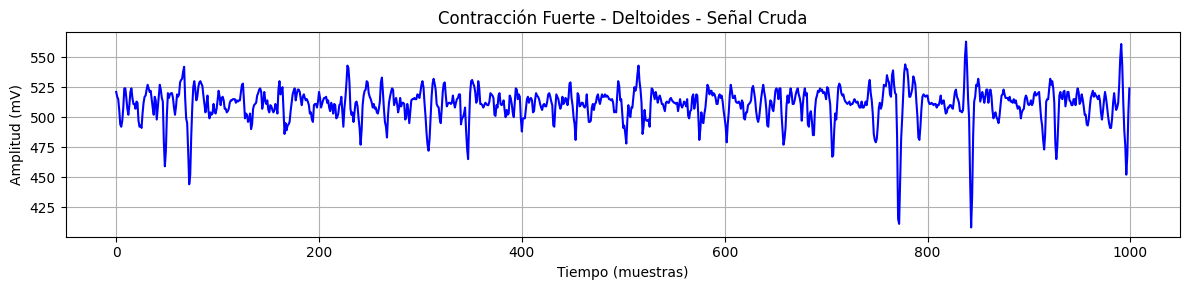

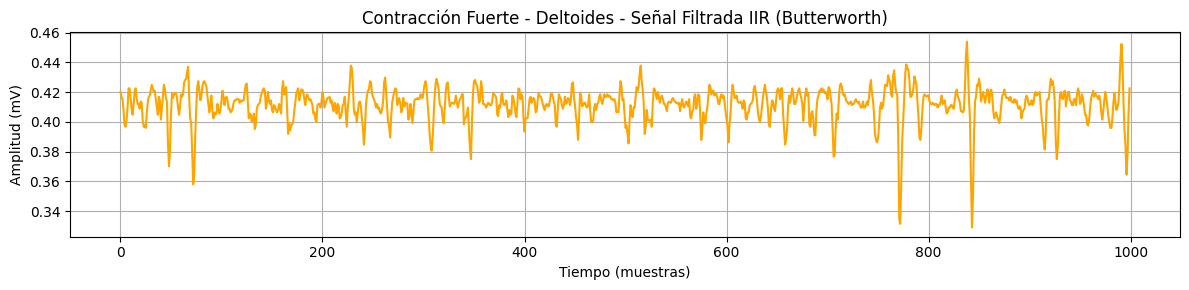

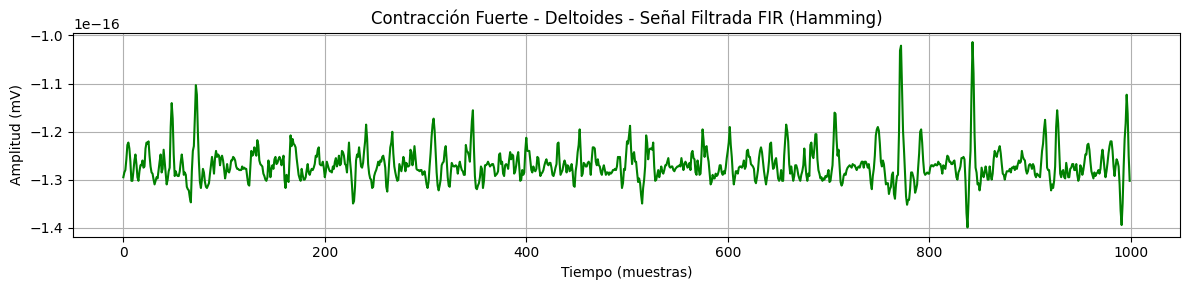

In [ ]:
graficar_emg_completo(reposo, reposo_iir, reposo_fir, "Reposo - Deltoides")
graficar_emg_completo(simple, simple_iir, simple_fir, "Contracción Débil - Deltoides")
graficar_emg_completo(contra, contra_iir, contra_fir, "Contracción Fuerte - Deltoides")

